The idea here is to test the popular TikTok hypothesis that mimic-ing U.S. Senator's trades is a good way to make money. 

1. First, we want to create a total Senator Portfolio

2. We will update this as Senators make trades

3. We then calculate the log-returns of this portfolio and compare these returns to the log returns of various ETFs and calculate whether this portfolio is worth investing in. 


## Creating Senator Index

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as dt

### Now we get our data

In [6]:
spy = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
Date,,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200,NaN,NaN
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500,0.000000,0.000000
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300,0.005686,0.005670
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400,0.004240,0.004231
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500,0.012667,0.012588


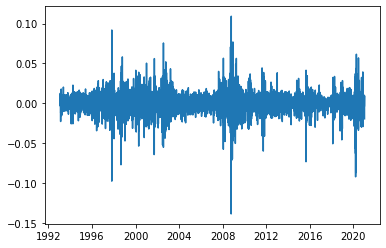

In [7]:
# Calculating log returns
spy['pct_change'] = spy["Open"].pct_change()
spy['log_ret'] = np.log(spy.Open) - np.log(spy.Open.shift(1))
plt.plot(spy["log_ret"])
spy.head()


In [29]:
with open('./all_ticker_transactions.json') as f:
  senate_trades = json.load(f)
sen_trades = pd.DataFrame(senate_trades)
sen_trades = sen_trades.set_index("ticker")
test = sen_trades.loc["BA"]["transactions"]

In [63]:
def find_aggregate_cost(transact_lst):
    '''Finds the current value of a ticker in the senate portfolio if all transations are maximal'''
    total_units = 0
    ticker=get_ticker(transact_lst[0])
    ticker = yf.download(ticker)
    if ticker.shape[0] == 0:
        return 0
    for t in transact_lst:
        sign = 1 if t["type"] == "Purchase" else -1 
        date = dt.datetime.strptime(t['transaction_date'], "%m/%d/%Y")
        try:
            cur_price = ticker.loc[date]["Adj Close"]
            total_units += money_range_to_int(t["amount"])*sign // cur_price
        except KeyError:
            print("failed to find price on ", date, " of ticker: ", get_ticker(transact_lst[0]))
            continue
    
    return total_units

def get_ticker(transact):
    unclean_ticker = transact["ticker"]
    start_val = transact["ticker"].find(">") + 1
    end_val = start_val
    while unclean_ticker[end_val].isalpha():
        end_val+=1
    return unclean_ticker[start_val:end_val]
    

def money_range_to_int(str_range):
    return eval(str_range[str_range[1:].find("$") + 2:].replace(",", ""))

portfolio = {}
for trades in sen_trades.values[1:]:
    trades = list(trades)[0]
    portfolio[get_ticker(trades[0])] = find_aggregate_cost(list(trades))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
failed to find price on  2020-12-08 00:00:00  of ticker:  NTRP
[*********************100%**************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
failed to find price on  2020-08-21 00:00:00  of ticker:  BRK
failed to find price on  2020-08-21 00:00:00  of ticker:  BRK
failed to find price on  2020-04-14 00:00:00  of ticker:  BRK
failed to find price on  2020-04-14 00:00:00  of ticker:  BRK
failed to find price on  2020-03-05 00:00:00  of ticker:  BRK
failed to find price on  2020-03-05 00:00:00  of ticker:  BRK
failed to find price on  2020-03-06 00:00:00  of ticker:  BRK
failed to find price on  2020-03-06 00:00:00  of ticker:  BRK
failed to find price on  2020-03-09 00:00:00  of ticker:  BRK
failed to find price on  2020-03-10 00:00:00  of ticker:  BRK
failed to find price on  2019-09-25 00:00:00  of ticker:  BRK
[*********************100%***********************]  1 of 1 completed
failed to find price on  2020-08-21 00:00:

ValueError: No objects to concatenate

In [64]:
print(portfolio)

{'BA': -115.0, 'PLUG': 420.0, 'SQ': 1337.0, 'NVDA': 4998.0, 'EXPI': 188.0, 'ETY': 10571.0, 'W': 1.0, 'TSLA': 239.0, 'COST': -1142.0, 'AAPL': -9171.0, 'ZM': 249.0, 'AIV': -6214.0, 'NTRP': -14147.0, 'CRSP': 1241.0, 'BLK': -268.0, 'PFE': -20119.0, 'WMT': -1522.0, 'UPS': 2814.0, 'SBUX': 12903.0, 'PLD': 18.0, 'PG': -986.0, 'JPM': 1387.0, 'MSFT': -1159.0, 'MDT': -839.0, 'LOW': -4782.0, 'IBM': 68.0, 'DOW': 2578.0, 'DIS': 2599.0, 'CMCSA': 1321.0, 'CSCO': 11132.0, 'CVS': -8450.0, 'AMGN': -1692.0, 'WFC': -9067.0, 'BYND': 614.0, 'V': 363.0, 'DAL': 26863.0, 'QCOM': -5793.0, 'SNPS': 68.0, 'GOLD': 1122.0, 'OHI': -1631.0, 'WIW': 5365.0, 'ERIC': 1238.0, 'SBIO': -178.0, 'ARE': -114.0, 'LGI': -1517.0, 'ABYIX': 1344.0, 'MRVL': 341.0, 'BRKR': 294.0, 'MANT': 434.0, 'ACIW': 466.0, 'SWKS': 674.0, 'NUAN': 362.0, 'AJRD': 399.0, 'SRVR': 1340.0, 'CONE': 25.0, 'CEF': 5962.0, 'WW': 227.0, 'XAR': 144.0, 'GLD': -280.0, 'GMAB': 410.0, 'BAH': 218.0, 'LDP': 3181.0, 'ABBV': -6037.0, 'FDN': 114.0, 'HBI': 2338.0, 'ATVI': 